**COMPREHENDING MULTILAYER PERCEPTRONS : HOW NETWORK DEPTH AFFECTS EFFICIENCY**

**PRACTICAL IMPLEMENTATION**

**NAME : SRIVARSHAN MEIPRAKASH**

**STUDENT ID : 23075537**

In [12]:
pip install numpy matplotlib keras

**Importing the required libraries**

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

**Training & Testing of MNIST dataset**

In [14]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

**Architecture of MLPS**

In [24]:
# Create a Sequential model
model = Sequential()

# Flatten the input data
model.add(Flatten(input_shape=(28, 28)))

# Add hidden layers
model.add(Dense(128, activation='relu'))  # First hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))   # Second hidden layer with 64 neurons

# Add output layer
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

In [16]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=10, 
                    batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2409 - accuracy: 0.9293 - val_loss: 0.1314 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1020 - accuracy: 0.9678 - val_loss: 0.0971 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0802 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0543 - accuracy: 0.9828 - val_loss: 0.0787 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.0789 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0875 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0863 - val_accuracy:

**Evaluation of Model**

In [17]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.9785
Test accuracy: 0.9785


**Plotting of Model Accuracy & loss**

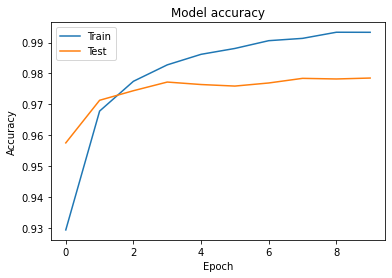

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

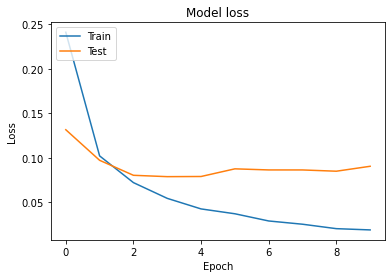

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
# Save the model for future use
model.save('mnist_mlp_model.h5')